$%%Matrix symbol macro
\newcommand{\matr}[1]{\mathbf{#1}} % undergraduate algebra version
%\newcommand{\matr}[1]{#1}          % pure math version
%\newcommand{\matr}[1]{\bm{#1}}     % ISO complying version$

# Initial Excitation

Photonic chip is pumped with 980nm laser light ($I_{pump}$). This excites atoms in the ground state ($^4I_{15/2}$) to the $^4I_{11/2}$ energy level. Fast non-radiative relaxation occurs (under low power excitation where concentration quenching effects can be ignored) to the long lifetime $^4I_{13/2}$ level. Decay from this level is radiative, emitting radiation centered around 1535 nm ($I_{signal}$).

This 3-level system is approximated as a 2-level system by assuming that the decay rate of the 3rd level is much greater than the decay from the 2nd long-lived level:

In [6]:
from IPython.display import Image

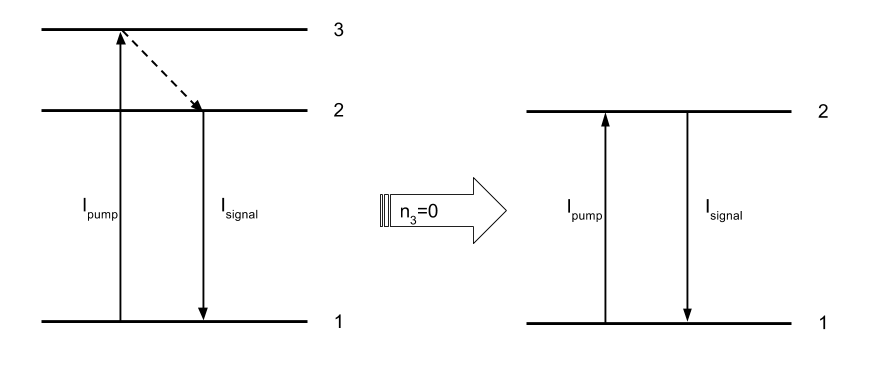

In [7]:
Image(filename='3-levelTo2-level.png') 

A typical room temperature spectrum ($I_{signal}$) of a photonic chip is shown below:

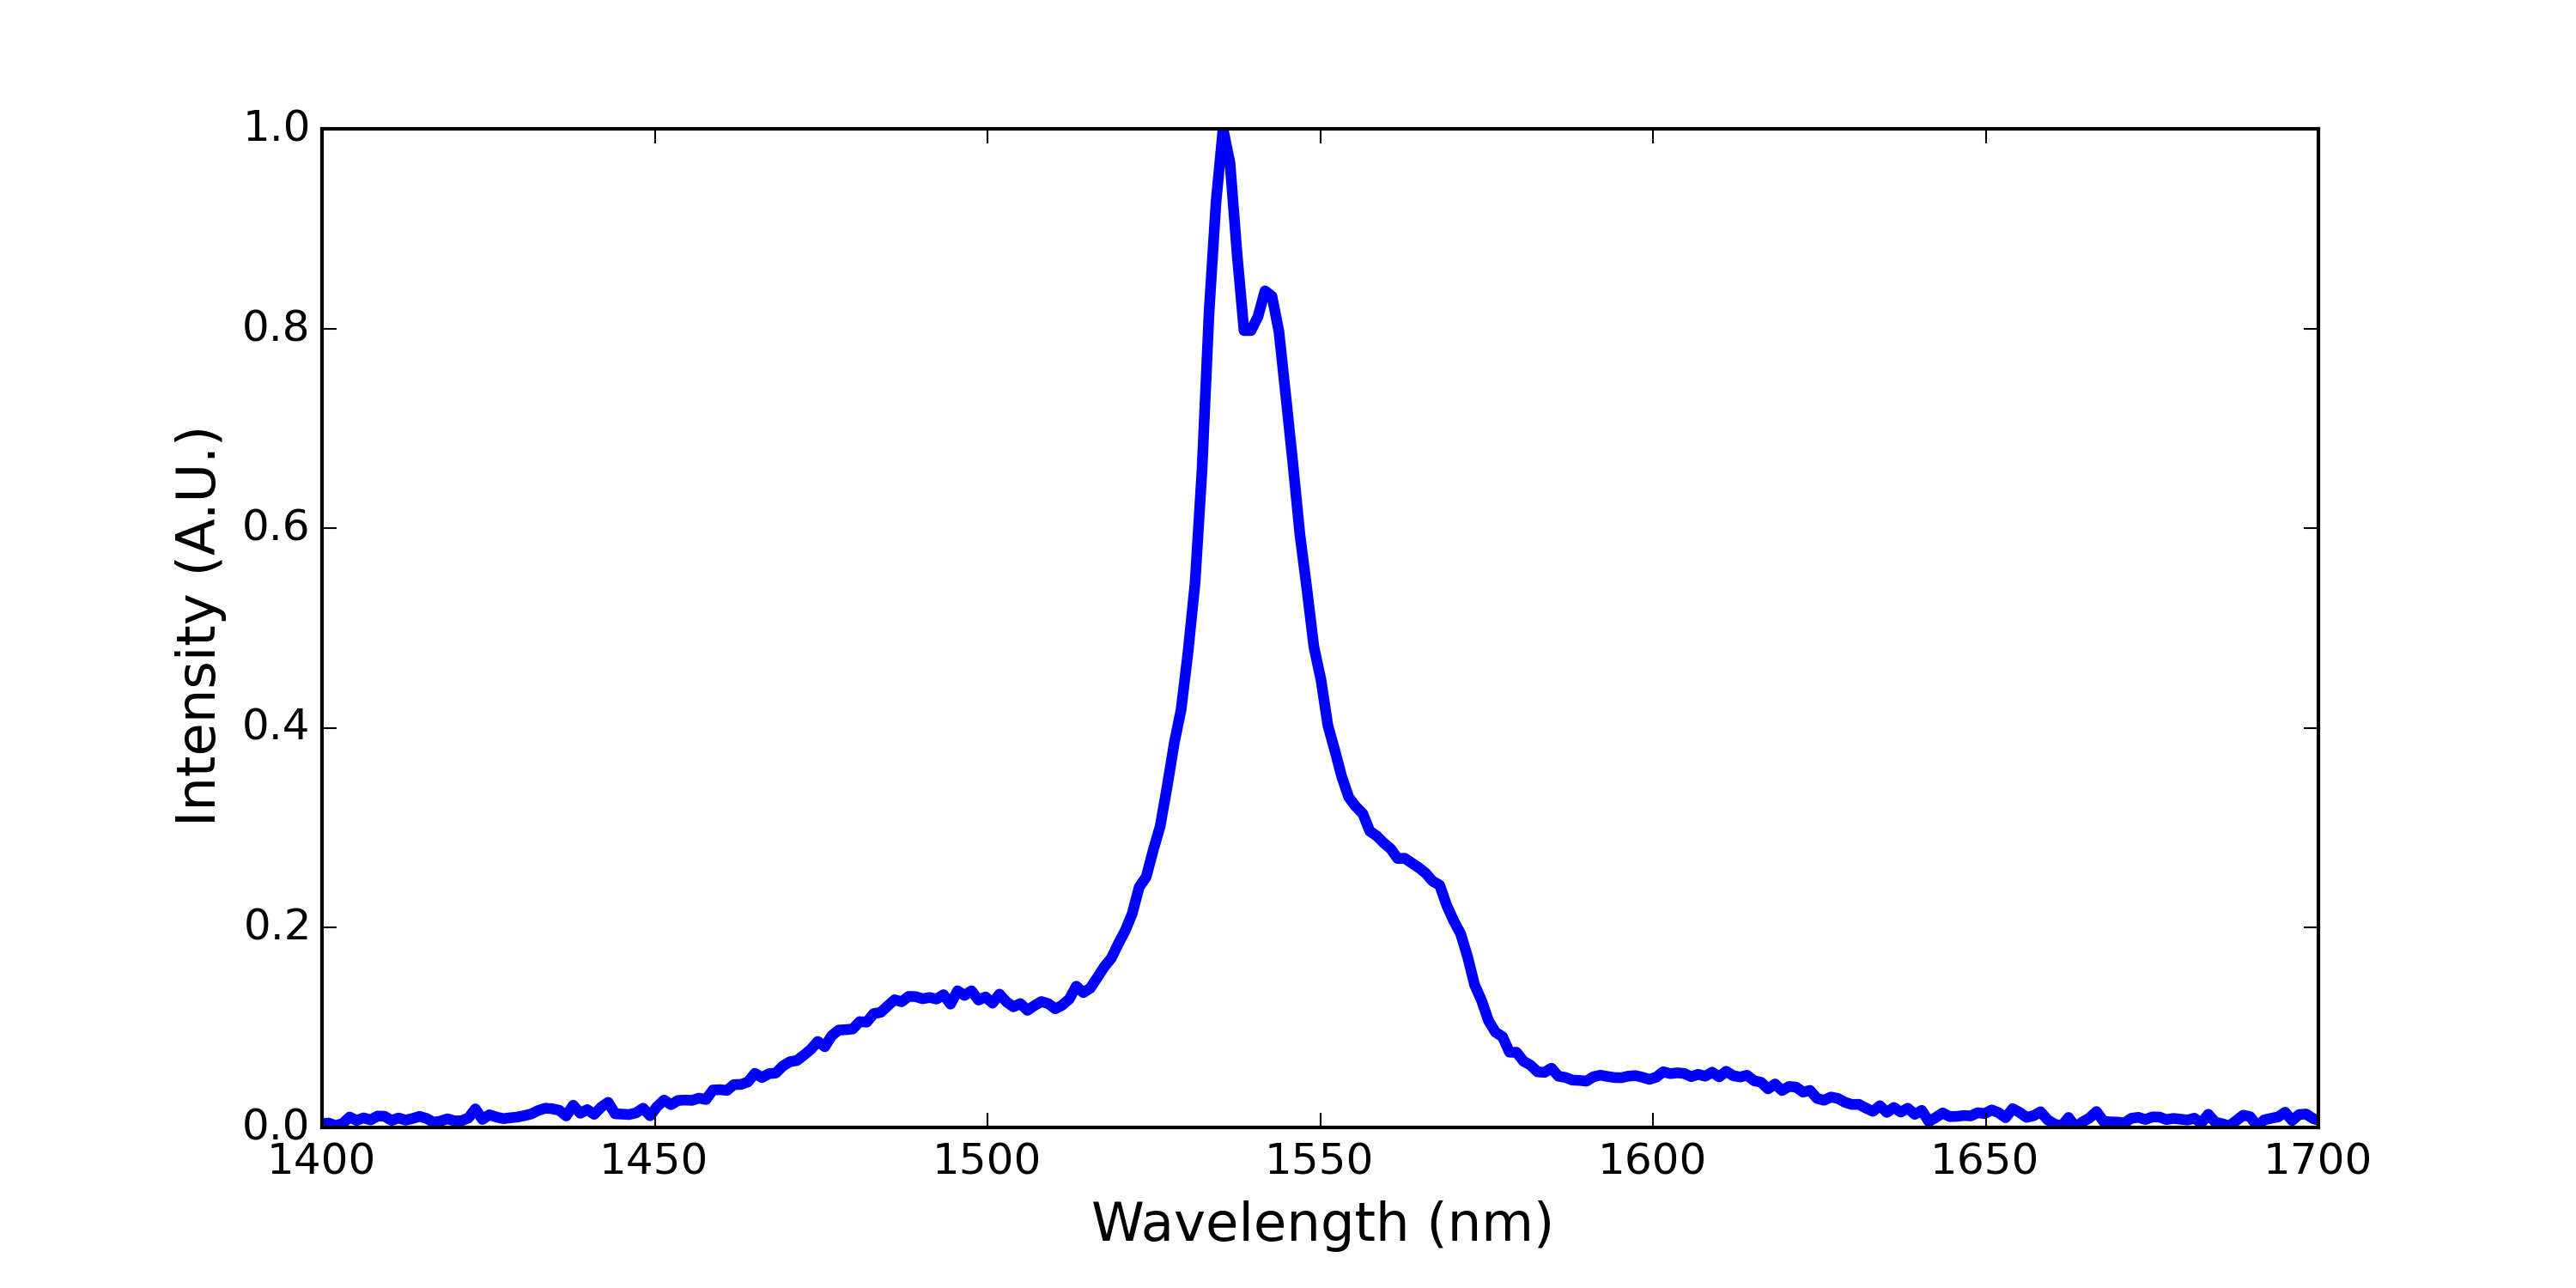

In [4]:
Image(filename='spectrum_T9.png') 

# Pump Turned Off

Once the pump is turned off and the excited atoms are allowed to fluoresce, the laser rate equations for the levels are:

\begin{equation}
\frac{\partial n_2}{\partial t} = -\frac{n_2}{\tau_{21}} + \frac{\sigma_{12}I_s}{h\nu_s}n_1 - \frac{\sigma_{21}I_s}{h\nu_s}n_2
\tag{1}
\end{equation}

\begin{equation}
\frac{\partial n_1}{\partial t} = +\frac{n_2}{\tau_{21}} - \frac{\sigma_{12}I_s}{h\nu_s}n_1 + \frac{\sigma_{21}I_s}{h\nu_s}n_2 \equiv - \frac{\partial n_2}{\partial t}
\tag{2}
\end{equation}

where $n_1$ and $n_2$ represent the fractional populations of the 1st and 2nd levels, respectively. $I_s$ represents the intensity of the fluorescence (signal), $\nu_s$ the frequency of the signal light, $\tau_{21}$ the lifetime of the excited level, $\sigma_{12}$ and $\sigma_{21}$ the absorption and emission cross sections, respectively.

The first term on the RHS of equation 1 represents spontaneous emission, the second term ground state signal re-absorption and the last term stimulated emission due to the signal.

## Solving...

### Recasting in matrix form

Eq 1 and 2 can be rewritten as

\begin{equation}
\begin{aligned}
\dot{n_2} &= \frac{\sigma_{12}I_s}{h\nu_s}n_1 - \left(\frac{1}{\tau_{21}}+\frac{\sigma_{21}I_s}{h\nu_s}\right) \\
&= An_1 - B n_2 \\ \\
\dot{n_1} &= -An_1 + B n_2
\end{aligned}
\tag{3,4}
\end{equation}

where $A = \frac{\sigma_{21}I_s}{h\nu_s}$ and $B = \frac{1}{\tau_{21}}+\frac{\sigma_{21}I_s}{h\nu_s}$. Letting 
$$\vec{n} = \begin{pmatrix} n_1 \\ n_2 \end{pmatrix}$$

equations 3 and 4 can be rewitten in matrix form as

\begin{equation}
\dot{\vec{n}} = \begin{pmatrix} -A & B \\ A & -B \end{pmatrix} \vec{n} = \matr{F}\vec{n}.
\end{equation}

### Find Eigenvalues ($\lambda$)

\begin{equation}
\begin{aligned}
\det\left(\matr{F} - \lambda\matr{I}\right) &= 0 \\
\begin{vmatrix} -A-\lambda & B \\ A & -B-\lambda \end{vmatrix} &= 0\\
(-A-\lambda)(-B-\lambda) - AB &= 0\\
\lambda ( \lambda + A + B )&= 0\\
\end{aligned}
\end{equation}

$$\Rightarrow \lambda_1 = 0,~ \lambda_2=-(A+B)$$

### Find Eigenvectors ($\vec{\eta}$)

\begin{equation}
\begin{aligned}
\matr{F} \vec{\eta} &= \lambda \vec{\eta} \\ 
\left(\matr{F} - \lambda\matr{I}\right)\vec{\eta} &= 0 \\
\end{aligned}
\end{equation}

Solve for $\lambda_1=0$:

\begin{equation}
\begin{aligned}
\begin{pmatrix} -A& B \\ A & -B \end{pmatrix}\vec{\eta} &= 0\\
-A\eta_1 + B \eta_2 &= 0 \\
\eta_1 &= \frac{B}{A}\eta_2
\end{aligned}
\end{equation}

\begin{equation}
\vec{\eta}^{(1)} = \begin{pmatrix} B \\ A\end{pmatrix},~ \vec{\eta_2} = A
\end{equation}

Solve for $\lambda_2=-(A+B)$:

\begin{equation}
\begin{aligned}
\begin{pmatrix} -A+(A+B)& B \\ A & -B+(A+B) \end{pmatrix}\vec{\eta} &= 0\\
\begin{pmatrix} B & B \\ A & A \end{pmatrix}\vec{\eta} &= 0\\
B\eta_1 + B \eta_2 &= 0 \\
\eta_1 &= -\eta_2
\end{aligned}
\end{equation}

\begin{equation}
\vec{\eta}^{(2)} = \begin{pmatrix} -1 \\ 1\end{pmatrix},~ \vec{\eta_2} = 1
\end{equation}

### General Solution

Recap: A system that can be described as $\dot{\vec{x}} = \matr{F}\vec{x}$ must have a solution of the form $\vec{x} = \vec{\eta}\exp\left(\lambda t\right)$.

\begin{equation}
\begin{aligned}
\vec{n}(t) &= C_1 \exp\left(\lambda_1 t\right)\vec{\eta}^{(1)} + C_2 \exp\left(\lambda_2 t\right)\vec{\eta}^{(2)} \\
&= C_1 \exp\left(0 t\right)\begin{pmatrix} B \\ A\end{pmatrix} + C_2 \exp\left(-(A+B) t\right)\begin{pmatrix} -1 \\ 1\end{pmatrix} \\
&= C_1 \begin{pmatrix} B \\ A\end{pmatrix} + C_2 \exp\left(-(A+B) t\right)\begin{pmatrix} -1 \\ 1\end{pmatrix} \\
\end{aligned}
\end{equation}

### Find Constants ($C_1$ and $C_2$)

Initial conditions: 
$$\vec{n}(0)=\begin{pmatrix}1-x\\x\end{pmatrix}\\$$
where $x$ is the fraction of atoms excited as soon as the pump is turned off (i.e. $x = n_2(0)$). Note that $n_1(t) + n_2(t) = 1$ for all $t$. 

Substitue the initial condition into the previous general solution

\begin{equation}
\vec{n}(0) = \begin{pmatrix}1-x\\x\end{pmatrix} = C_1 \begin{pmatrix} B \\ A\end{pmatrix} + C_2 \begin{pmatrix} -1 \\ 1\end{pmatrix}
\end{equation}

Rewriting each equation individually:

\begin{equation}
\begin{aligned}
1-x &= BC_1 - C_2 \Rightarrow C_2 = BC_1 - 1 + x \\
x &= AC_1 + C_2 \Rightarrow C_1 = \frac{x - C_2}{A}
\end{aligned}
\end{equation}

Solving via substitution gives

\begin{equation}
C_1 = \frac{1}{A+B}
\end{equation}

\begin{equation}
C_2 = \frac{B}{A+B}-1-x
\end{equation}

### Final Solution

\begin{equation}
\vec{n}(t) = \frac{1}{A+B} \begin{pmatrix} B \\ A \end{pmatrix} + \left( x - \frac{1}{A+B}\right)e^{-(A+B)t} \begin{pmatrix} -1 \\ 1 \end{pmatrix}
\end{equation}

where $A = \frac{\sigma_{21}I_s}{h\nu_s}$, $B = \frac{1}{\tau_{21}}+\frac{\sigma_{21}I_s}{h\nu_s}$ and $x=n_2(0)$.

Thus

\begin{equation}
\begin{aligned}
n_2(t) &= \frac{A}{A+B} + \left( n_2(0) - \frac{A}{A+B}\right)e^{-(A+B)t} \\
\end{aligned}
\end{equation}

The exponentail term dictates the measured decay time measured, $\tau_m$, as follows:

\begin{equation}
\begin{aligned}
\tau_m &= \frac{1}{A+B} \\ \\
&= \left.\tau_{21}\middle/1+\frac{\tau_{21}I_s(\sigma_{21}+\sigma_{12})}{h\nu_s}\right..
\end{aligned}
\tag{5}
\end{equation}

## Glucose Interaction

Placing a finger onto the photonic chip will cause a certain amount of the fluorescence ($I_s$) to be diffusely reflected ($r_d$) back into the photonic chip due to backscattering from cells in the skin. Thus placing a finger onto the chip causes

$$I_s \rightarrow I_s + I_sr_{d} = I_s(1+r_d).$$

Substituting this into equation 5 gives

\begin{equation}
\tau_m = \left.\tau_{21}\middle/1+\frac{\tau_{21}I_s(1+r_d)(\sigma_{21}+\sigma_{12})}{h\nu_s}\right..
\tag{6}
\end{equation}

We assume that an increase in glucose causes an increase in the absorption of $I_s$, which manifests itself as a reduction of $r_d$. From equation 6 it is clear that a reduction in $r_d$ will give an increase in $\tau_m$. 

Points to note for this model (low intenstiy pumping)

* Increasing the fraction of excited atoms at the start of the decay will increase the size of the exponential. This may be beneficial to improve signal to noise in the measurement.

* Increasing the fraction of excited atoms at the start of the decay  will also increase the intensity of the fluorescence ($I_s$), which will increase the lifetime dependence on $r_d$

* We are assuming that $I_s$ is constant in time. We know that this is not true as it follows the exponential decay of $n_2(t)$.

### Simulation

In [46]:
# Parameters (from table III in 'Erbium implanted thin film photonic materials' by polman)
t_21 = 10         # Lifetiem of erbium ions (ms)
I_s = 1E-8        # Intensity of the signal (W) - GUESS
sig_21 = 5E-25    # Signal emission cross section (m^2) (converted from 5E-21 cm^2)
sig_12 = 4.1E-25  # Signal absorption cross section (m^2)
h = 6.626E-34     # Planck's Constant (m^2 kg/s)
lamb_s = 1535E-9  # wavelength of fluorescence (m)
c = 3E8           # Speed of light (m/s)
v_s = c / lamb_s  # Frequency of fluorescence (s^-1)

In [47]:
import numpy as np
r_d = np.linspace(0.1,0.15)  # Guess a 5% change in reflectance due to glucose - probably too large

denomfrac = (t_21*I_s*(1+r_d)*(sig_21+sig_12))/(h*v_s)
t_m = t_21 / (1+denomfrac)

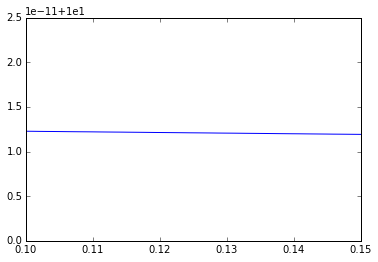

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r_d,t_m)

In [51]:
max(t_m)

9.9999999999922711

In [52]:
min(t_m)

9.9999999999919194

In [53]:
max(t_m)-min(t_m)

3.5171865420124959e-13

...not a detectable change. Are parameters ok/need to include upconversion? It the aproximation of $I_s=const$ wrong. 

$I_s$ is equal to $-\frac{\partial n_2}{\partial t}$